In [1]:
import PIL
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargado de imagen

In [2]:
# Cargamos la imagen haciendo uso de la librería pillow
image = Image.open('./images/mariobros.jpeg')

In [3]:
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x341 at 0x202FC4ED0D0>


Veis que la imagen que hemos cargado es un objeto de PIL. La vamos a convertir en un array de numpy para poder trabajar con ella

In [4]:
# Vamos a convertir la imagen que acabamos de cargar en una matriz para analizarla más en profundidad
img = np.array(image)

In [5]:
# Mostramos el tamaño de la imagen que hemos cargado
print('Tamaño de imagen: ', img.shape)

Tamaño de imagen:  (341, 512, 3)


Hemos cargado una imagen de 341 filas, 512 columnas y 3 calanes (ya que se trata de una imagen en color, concretamente, se encuentra codificada en formato RGB).

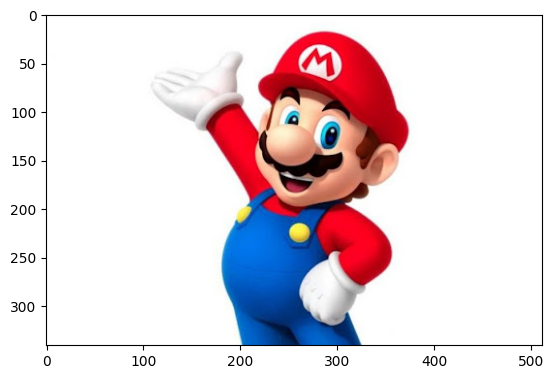

In [6]:
# Visualizamos la imagen
plt.imshow(img)

NOTA: openCV también tiene in método para lectura de imagen, sin embargo, esta libería carga las imágenes con codificación BGR en lugar de RGB. Ejecuta el siguiente código para ver la diferencia

```
image=cv2.imread("mariobros.jpeg")
plt.imshow(image)
```

A continuación, vamos a visualizar cada uno de los canales de manera independiente.

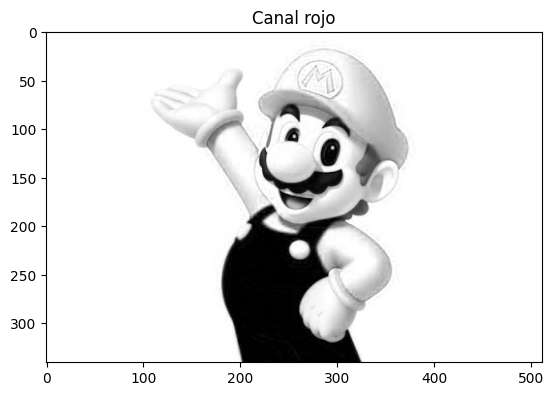

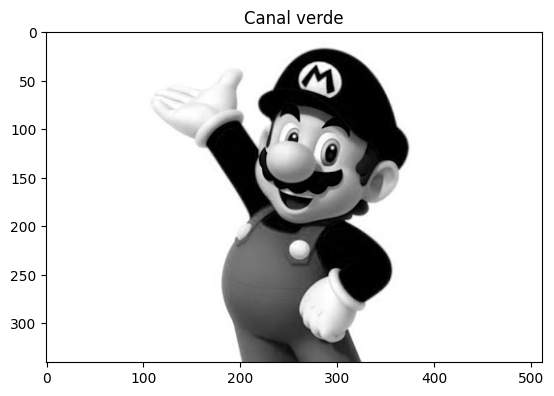

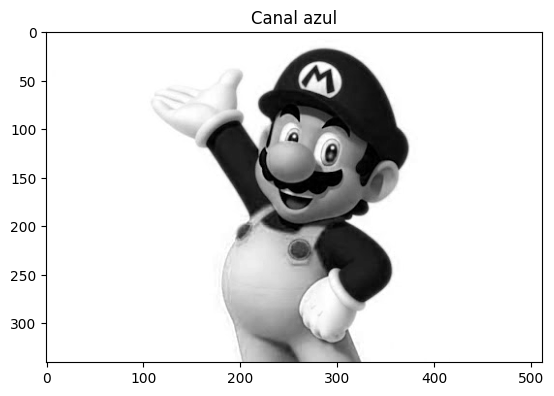

In [7]:
# Canal rojo - Primer canal
plt.imshow(img[:, :, 0], 'gray')
plt.title('Canal rojo')
plt.show()

# Canal verde - Segundo canal
plt.imshow(img[:, :, 1], 'gray')
plt.title('Canal verde')
plt.show()

# Canal azul - Tercer canal
plt.imshow(img[:, :, 2], 'gray')
plt.title('Canal azul')
plt.show()

En las tres imágenes anteriores podemos observar la imagen correspondiente a visualizar únicamente el canal rojo, el canal verde y el canal azul, repectivamente. Estos tres colores, codificados en RGB se representan de la siguiente forma:

- Rojo: [255, 0, 0]
- Verde: [0, 255, 0]
- Azul: [0, 0, 255]

Por este motivo, cuando visualizamos, por ejemplo, el canal rojo, vemos que los objetos rojos como la gorra o la camiseta aparecen en blanco ya que toman un valor 255. Lo mismo lo podemos observar en la imagen correspondiente al color azul, donde el peto se ve también de un color claro (no se ve completamente blanco ya que no se trata de un azul puro).

El blanco se mantiene blanco en los tres canales ya que se codifica como [255, 255, 255]. Al igual que el negro que se codifica como [0, 0, 0].

# Codificación

A continuación, vamos a convertir la imagen original a otras codificaciones como escala de grises o HSV:

In [8]:
# Convertimos la imagen a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [9]:
# Mostramos tamaño de la nueva imagen
print('Tamaño de imagen escala de grises: ', img_gray.shape)

Tamaño de imagen escala de grises:  (341, 512)


En esta ocasión vemos que la dimensión correspondiente al canal "ha desaparecido". Esto es porque esta ha tomado un valor de 1 ya que, como hemos anticipado antes, las imágenes en escala de grises se representan con una única matriz.

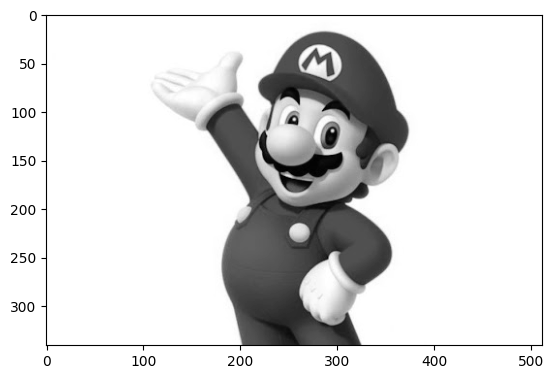

In [10]:
# Visualizamos la imagen generada
plt.imshow(img_gray, 'gray')

# Tenemos que especificar que la queremos ver en escala de grises a través del argumento 'gray', esto en imágenes en RGB no es necesario, 
# pero cuando trabajamos con imágenes de un canal es necesario especificar como queremos ver la image

In [11]:
# Convertimos imagen a codificación HSV

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [12]:
# Mostramos tamaño
print('Tamaño de imagen HSV:', img_hsv.shape)

Tamaño de imagen HSV: (341, 512, 3)


En codificación HSV vemos que también nos encontramos la imagen representada por 3 canales.

Ahora ya sabemos como cargar una imagen y visualizarla. 
A continuación, vamos a ver como podemos aplicarle transformaciones.

# Redimensionado

Vamos a ver como podemos cambiar el tamaño de la imagen. 
En ocasiones, nos va a interesar redimensionar las imágenes. Esto puede ocurrir en los siguientes escenarios:

- Tenemos un conjunto de imágenes de componen nuestra base de datos de entrenamiento. Una CNN, como veremos, necesita que se especifique un tamaño concreto de imagen. Por lo tanto, deberemos de preparar la base de datos de forma que todas las imágenes se redimensionen a un tamaño común.
- Como sabéis, las CNN son muy demandantes de memoria RAM. En ocasiones, si trabajamos con imágenes muy grandes, puede que tengamos problemas de falta de memoria. En estas ocasiones, una de las posibles soluciones sería disminuier el tamaño de las imágenes de entrada a la CNN.

Text(0.5, 1.0, 'Imagen redimensionada')

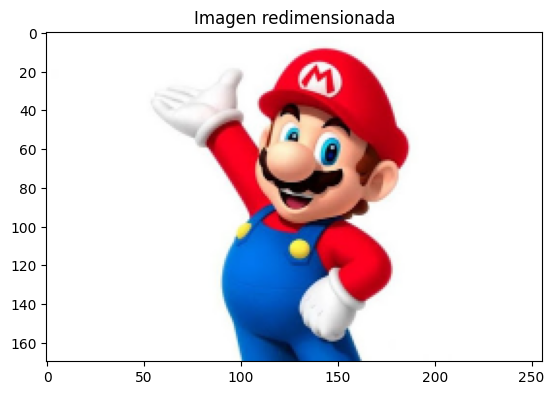

In [13]:
# Redimensionamos la imagen a la mitad

new_rows = int(img.shape[0] / 2)
new_cols = int(img.shape[1] / 2)

img_resize = cv2.resize(img, (new_cols, new_rows))

plt.imshow(img_resize)
plt.title('Imagen redimensionada')


**IMPORTANTE!!!**

Fijaros en el orden en el que se especifican las dimensiones, primero el número de columnas y luego el número de filas.
Esto es porque:

* Columnas --> Corresponde a la anchura (eje x)
* Filas --> Corresponde a la altura (eje y)

Si miramos la **documentación** de OpenCV, se especifica que se introduzcan las nuevas dimensiones como (ancho, alto)

In [14]:
# Mostramos el nuevo tamaño de la imagen
img_resize.shape

(170, 256, 3)

Como regla general, cuando redimensionemos una imagen **a un tamaño más grande** emplearemos la interpolación bilineal o bicúbica ya que emplea un algoritmo específico para preservar la continuidad de los objetos en las imágenes.

Por otro lado, como veremos cuando trabajemos con problemas de segmentación, las matrices con la etiqueta será necesario redimensionarlas si redimensionamos la imagen de referencia. Estas matrices contienen la etiqueta (número entero positivo) a la que pertenece cada pixel de la imagen. En este caso, no nos interesa la continuidad entre los objetos sino mantener las etiquetas correspondientes. Para redimensionar estas matrices emplearemos el algoritmo del vecino más cercano (en caso de hacer una matriz más grande, a los nuevos píxeles se les asigna el valor del pixel más cercano).

OpenCV permite especificar el tipo de transformación que aplicmos a la imagen. Por defecto, OpenCV emplea interpolación bilineal. Para especificar el tipo de transformación lo podemos realizar de la siguiente forma:

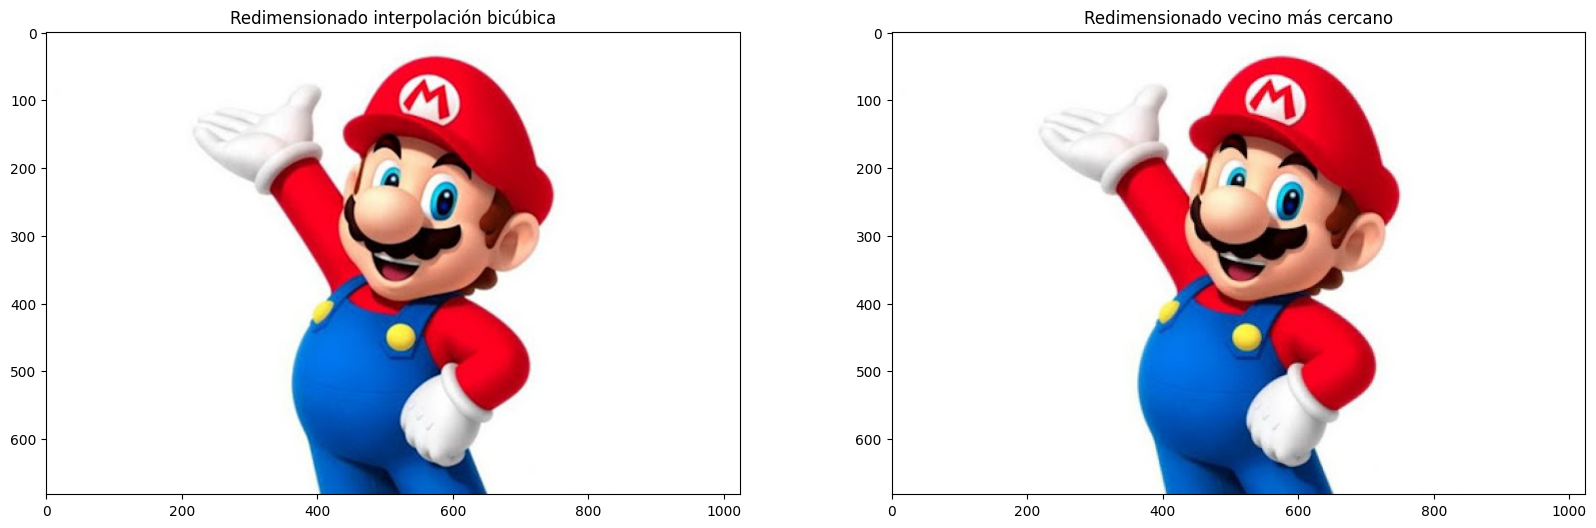

In [15]:
# Vamos a redimensionar la imagen al doble de su tamaño

new_rows = int(img.shape[0] * 2)
new_cols = int(img.shape[1] * 2)

### Transformación bicúbica

# Permite especificar el algoritmo empleado para redimensionar la imagen: cv2.INTER_CUBIC
img_resize = cv2.resize(img, (new_cols, new_rows), interpolation=cv2.INTER_CUBIC)

### Transformación vecino más cercano

# Permite especificar el algoritmo empleado para redimensionar la imagen: cv2.INTER_NEAREST
img_resize_nearest = cv2.resize(img, (new_cols, new_rows), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_resize)
plt.title('Redimensionado interpolación bicúbica')

plt.subplot(1, 2, 2)
plt.imshow(img_resize_nearest)
plt.title('Redimensionado vecino más cercano')
plt.show()


En este caso no hay demasiada diferencia ya que los colores de la imagen con la que estamos trabajando son iguales en regiones amplias

# Giro izquierda-derecha y arriba-abajo

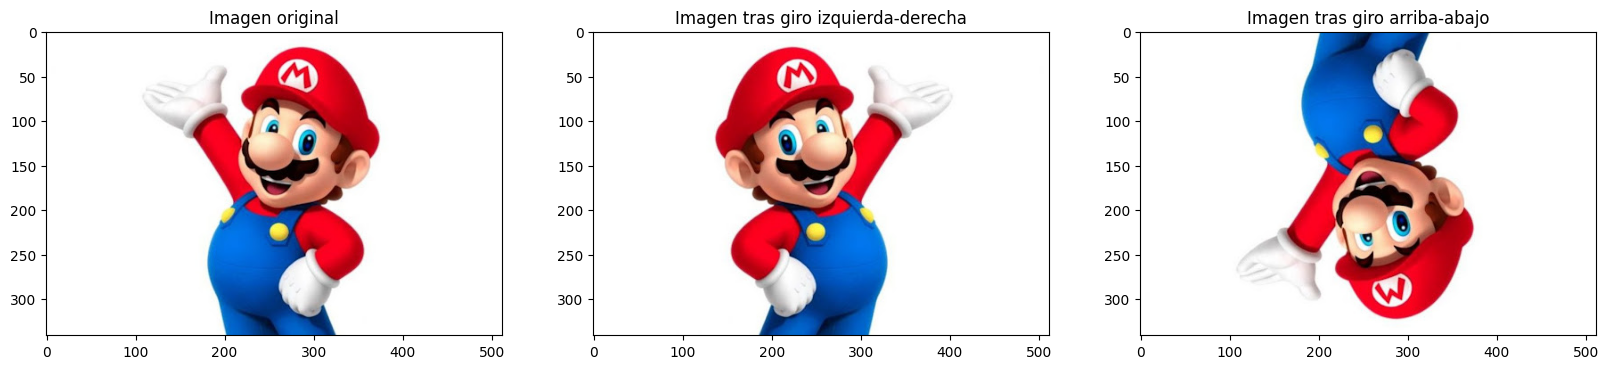

In [16]:
# Haciendo uso de la librería numpy

img_lr = np.fliplr(img)  # Giro izquierda - derecha
img_ud = np.flipud(img)  # Giro arriba - abajo

# Visualizamos imagen original e imágenes giradas
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(img_lr)
plt.title('Imagen tras giro izquierda-derecha')
plt.subplot(1, 3, 3)
plt.imshow(img_ud)
plt.title('Imagen tras giro arriba-abajo')
plt.show()

# Rotaciones

In [17]:
# Para esto vamos a crear una función que tome la imagen a rotar y el ángulo de rotación

def rotate_image(image, angle):
    # Extraemos la altura y anchura de la imagen
    height, width = image.shape[:2]

    # Calculamos la matriz de rotación
    # Empleamos el centro de la imagen como punto sobre el que realizar la rotación
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotamos la imagen
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

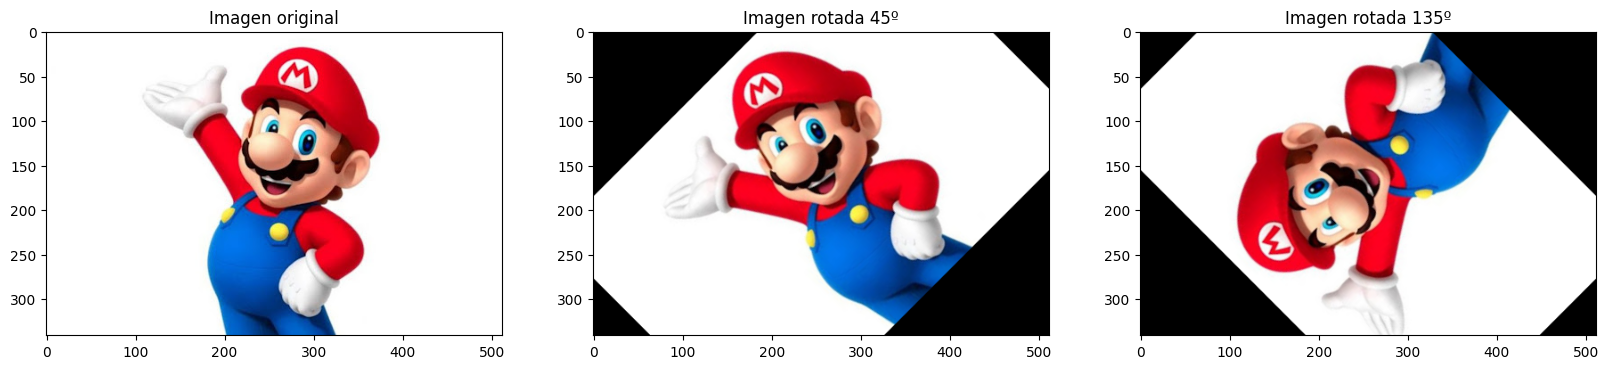

In [18]:
# Vamos a emplear la función anterior para aplicar dos rotaciones: 45º y 135º
img_rot_45 = rotate_image(img, 45)
img_rot_135 = rotate_image(img, 135)
# Visualizamos la imagen original y las 2 imágenes rotadas
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(img_rot_45)
plt.title('Imagen rotada 45º')
plt.subplot(1, 3, 3)
plt.imshow(img_rot_135)
plt.title('Imagen rotada 135º')
plt.show()

De las imágenes anteriores podemos observar que cuando rotamos una imagen hay píxeles nuevos que se han generado (los de las esquinas). Si no se especifica nada, por defecto se le asigna un valor nulo (0, 0, 0), es decir, negro. En ocasiones, puede que conozcamos que valor le podemos asignar a esos píxeles, como es nuestro caso. En nuestro caso sería preferible asignarle un valor blanco para que la imagen generada sea más "real".

Por lo tanto, vamos a repetir la rotación anterior pero, en esta ocasión, vamos a especificar el color de relleno blanco (255, 255, 255).

**NOTA**: El color de rellene se debe de especificar en formato BGR, por lo tanto, si lo quisiéramos azul sería (255, 0, 0) y si lo quisiéramos rojo (0, 0, 255).

In [19]:
# Vamos a repetir la función anterior para esta vez especificar también el color de relleno:

# Para esto vamos a crear una función que tome la imagen a rotar y el ángulo de rotación

def rotate_image(image, angle, fill_color=(0, 0, 0)):
    # Extraemos la altura y anchura de la imagen
    height, width = image.shape[:2]

    # Calculamos la matriz de rotación
    # Empleamos el centro de la imagen como punto sobre el que realizar la rotación
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotamos la imagen especificando el color de fondo
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderValue=fill_color)

    return rotated_image

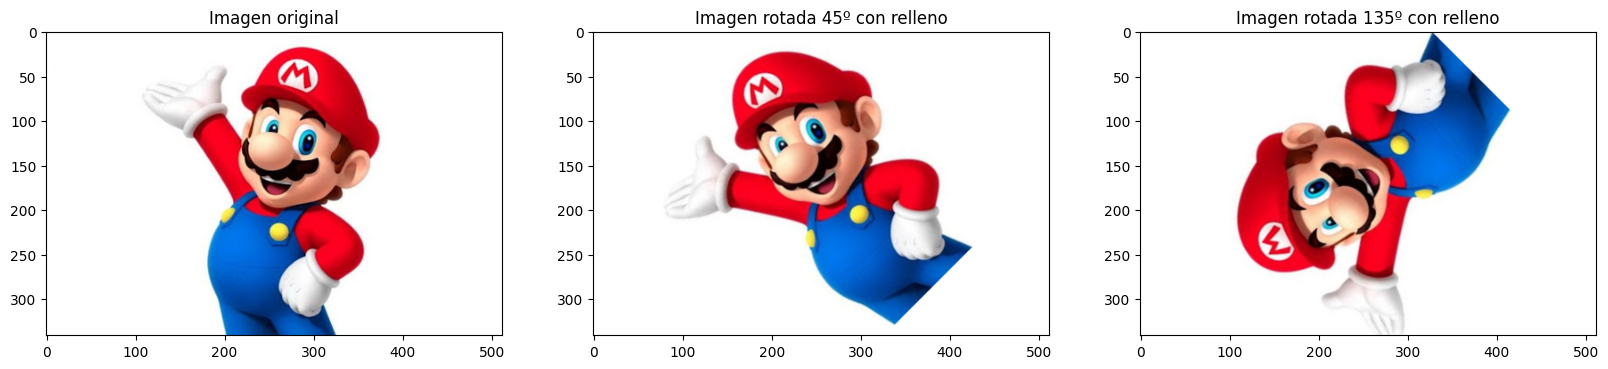

In [20]:
img_rot_45_fill = rotate_image(img, 45, fill_color=(255, 255, 255))  # Rotamos 45º
img_rot_135_fill = rotate_image(img, 135, fill_color=(255, 255, 255))  # Rotamos 135º

# Visualizamos la imagen original y las 2 imágenes rotadas
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(img_rot_45_fill)
plt.title('Imagen rotada 45º con relleno')
plt.subplot(1, 3, 3)
plt.imshow(img_rot_135_fill)
plt.title('Imagen rotada 135º con relleno')
plt.show()

# Zoom

A la hora de aplicar zoom a la imagen, lo podemos hacer de dos formas diferentes:

- Zoom hacia dentro (+), es decir, nos acercamos al centro de la imagen.
- Zoom hacia fuera (-). es decir, nos alejamos del centro de la imagen.

In [21]:
# Zoom hacia dentro
# Hacemos la imagen más grande para simular ese zoom y recortamos los bordes para tener una imagen del tamaño original
def zoom_in(image, factor):
    # Calculamos el nuevo tamaño de la imagen
    new_width = int(image.shape[1] * factor)
    new_height = int(image.shape[0] * factor)

    # Redimensionamos la imagen al tamaño nuevo
    zoomed_in_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    # Hacemos el zoom con respecto al centro de la imagen
    center_rows = int(zoomed_in_image.shape[0] / 2)
    center_cols = int(zoomed_in_image.shape[1] / 2)

    # Recortamos la imagen al tamaño original alrededor del centro
    start_rows = center_rows - int(image.shape[0] / 2)
    end_rows = start_rows + image.shape[0]

    start_cols = center_cols - int(image.shape[1] / 2)
    end_cols = start_cols + image.shape[1]

    zoomed_in_image = zoomed_in_image[start_rows:end_rows, start_cols:end_cols]

    return zoomed_in_image

In [22]:
# Zoom hacia afuera
def zoom_out(image, factor, fill_color=(0, 0, 0)):
    # Para hacer zoom hacia fuera lo que realmente estamos haciendo es añadir filas y columnas a los lados de la imagen para hacer la imagen más pequeña en relación
    rows_to_add = int(image.shape[0] * factor)
    cols_to_add = int(image.shape[1] * factor)

    # De todas las filas y columnas a añadir tenemos que distribuirlas entre el principio y final de la imagen para dejar la imagen centrada

    rows_to_add_ini = int(rows_to_add / 2)
    rows_to_add_end = rows_to_add - rows_to_add_ini

    cols_to_add_ini = int(cols_to_add / 2)
    cols_to_add_end = cols_to_add - cols_to_add_ini

    # Añadimos filas y columnas en el borde de la imagen (padding).
    # Primero definimos una matriz de ceros (vacía) que tenga el tamaño de la imagen original con el padding correspondiente
    img_zoom_negative = np.zeros(shape=(image.shape[0] + rows_to_add, image.shape[1] + cols_to_add, 3)).astype('uint8')

    # A continuación a todos los píxeles le vamos a dar el valor del fondo de la imagen original. 
    img_zoom_negative[:] = fill_color
    # Añadimos los imagen original en el centro de la imagen
    img_zoom_negative[rows_to_add_ini:img_zoom_negative.shape[0] - rows_to_add_end,
    cols_to_add_ini:img_zoom_negative.shape[1] - cols_to_add_end, :] = image

    # Redimensionamos al tamaño original de la imagen
    img_zoom_negative = cv2.resize(img_zoom_negative, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_CUBIC)

    return img_zoom_negative

In [23]:
# Finalmente vamos a crear una función de zoom
# En función del valor del factor aplicará zoom hacia dentro o hacia fuera

def zoom(image, factor, fill_color=(0, 0, 0)):
    if factor == 1:
        return image
    elif factor > 1:
        print('Zoom in')
        return zoom_in(image, factor)
    else:
        print('Zoom out')
        return zoom_out(image, factor, fill_color)

Zoom in
Zoom out


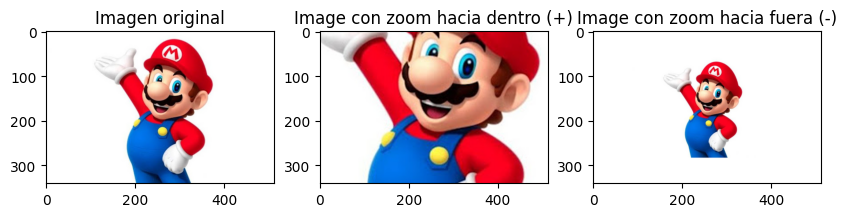

In [24]:
# Zoom hacia fuera
img_zoom_in = zoom(img, 2)
# Zoom hacia dentro
img_zoom_out = zoom(img, 0.5, fill_color=(255, 255, 255))

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(img_zoom_in)
plt.title('Image con zoom hacia dentro (+)')
plt.subplot(1, 3, 3)
plt.imshow(img_zoom_out)
plt.title('Image con zoom hacia fuera (-)')
plt.show()

# Translaciones

Con esto cambiamos la posición de los objetos. Por lo tanto, podemos hacer translaciones hacia los bordes de la imagen.

En nuestro ejemplo vamos a hacer una translación de la imagen hacia la esquina inferior izquierda.

In [25]:
def traslation(image, rows_factor, cols_factor, fill_color=(0, 0, 0)):
    # Calculamos el número de filas y columnas que se va a desplazar la imagen
    rows_to_move = int(image.shape[0] * rows_factor)
    cols_to_move = int(image.shape[1] * cols_factor)

    # Calculamos matriz de traslación
    T = np.float32([[1, 0, -cols_to_move], [0, 1, rows_to_move]])
    img_traslated = cv2.warpAffine(image, T, (image.shape[1], image.shape[0]), borderValue=fill_color)

    return img_traslated


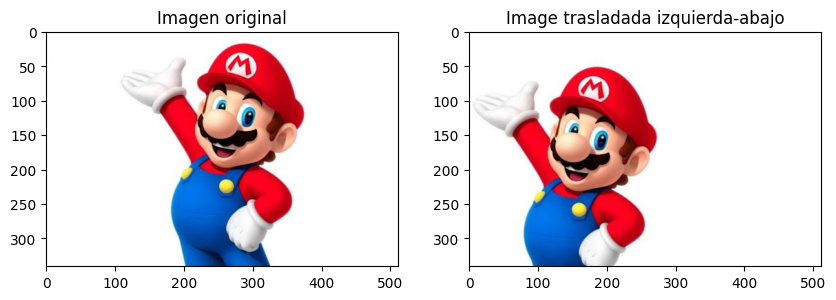

In [26]:

img_traslated = traslation(img, 0.1, 0.2, (255, 255, 255))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(img_traslated)
plt.title('Image trasladada izquierda-abajo')
plt.show()


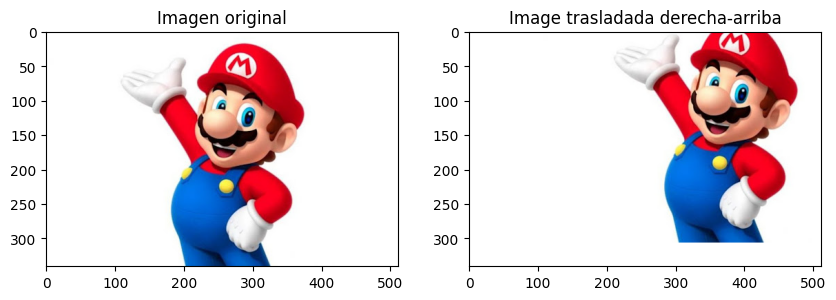

In [27]:
img_traslated = traslation(img, -0.1, -0.2, (255, 255, 255))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(img_traslated)
plt.title('Image trasladada derecha-arriba')
plt.show()

Con el método anterior antes podemos especificar el tipo de rellenado.
En ocasiones, el relleno constante no es la mejor opción, por lo que existen otras opciones como el rellenado en espejo y empleando el mismo valor que la fila y columna vecina correspondiente.

In [28]:
def traslation_border(image, rows_factor, cols_factor, border_mode=cv2.BORDER_REFLECT):
    # Calculamos el número de filas y columnas que se va a desplazar la imagen
    rows_to_move = int(image.shape[0] * rows_factor)
    cols_to_move = int(image.shape[1] * cols_factor)

    # Calculamos matriz de traslación
    T = np.float32([[1, 0, -cols_to_move], [0, 1, rows_to_move]])
    img_traslated = cv2.warpAffine(image, T, (image.shape[1], image.shape[0]), borderMode=border_mode)

    return img_traslated

Text(0.5, 1.0, 'Translación con relleno replicado')

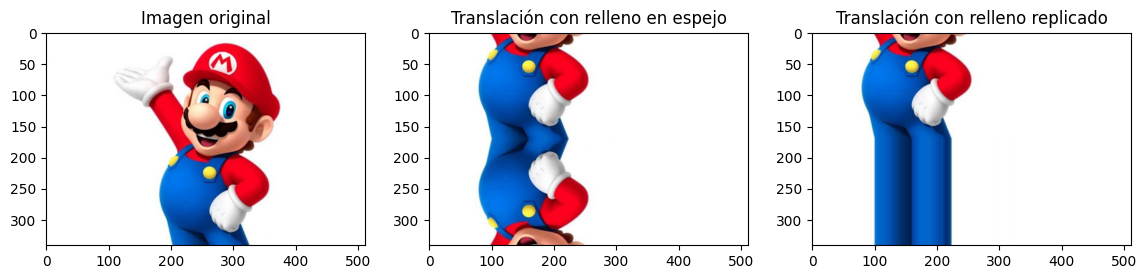

In [29]:

# Relleno en espejo
img_traslated_reflect = traslation_border(img, -0.5, 0.2, border_mode=cv2.BORDER_REFLECT)
# Relleno en replicada
img_traslated_replicate = traslation_border(img, -0.5, 0.2, border_mode=cv2.BORDER_REPLICATE)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(img_traslated_reflect)
plt.title('Translación con relleno en espejo')
plt.subplot(1, 3, 3)
plt.imshow(img_traslated_replicate)
plt.title('Translación con relleno replicado')

# Cambio de brillo y contraste

In [30]:
def brightness_contrast(image, brightness_control=0, contrast_control=1):
    new_image = cv2.convertScaleAbs(image, alpha=contrast_control, beta=brightness_control)

    return new_image

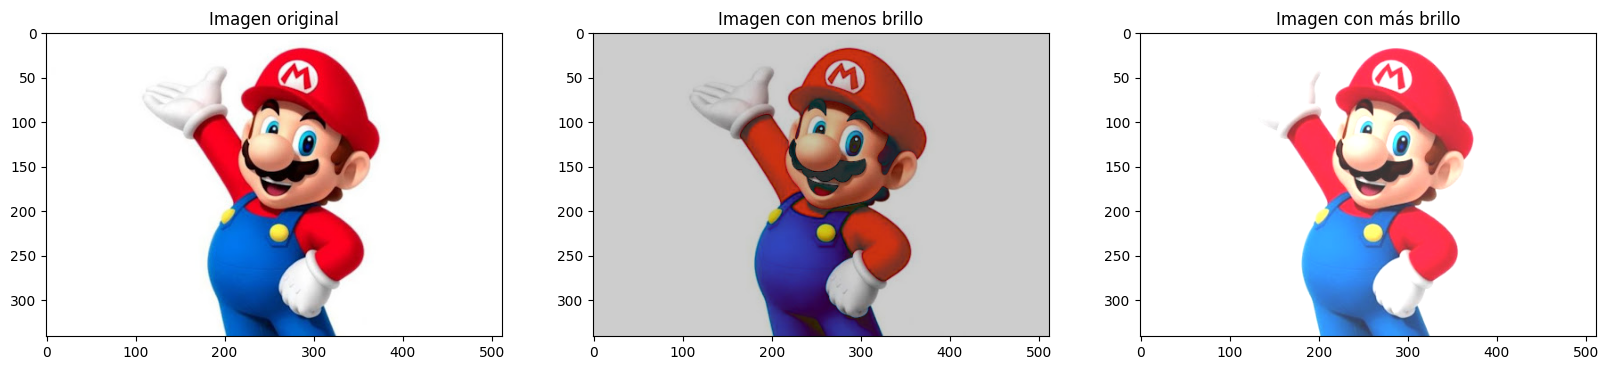

In [31]:
# Cambio brillo sólo

# Imagen con menos brillo (valor negativo)
image_less_brightness = brightness_contrast(img, brightness_control=-50)
# Imagen con más brillo (valor positivo)
image_more_brightness = brightness_contrast(img, brightness_control=50)

# Visualizamos las imagen original y las 2 imágenes creadas
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(image_less_brightness)
plt.title('Imagen con menos brillo')
plt.subplot(1, 3, 3)
plt.imshow(image_more_brightness)
plt.title('Imagen con más brillo')
plt.show()

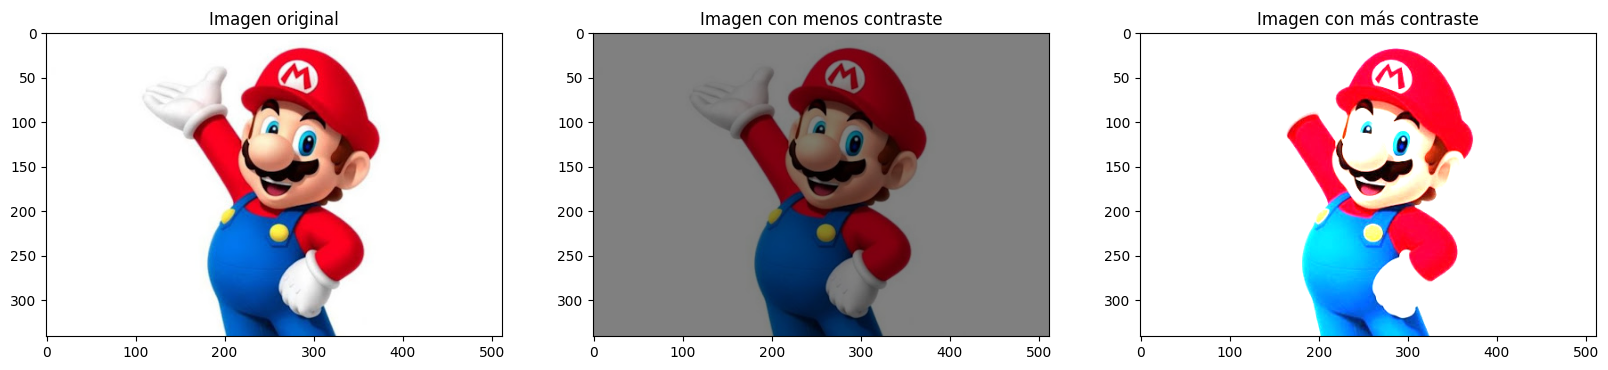

In [32]:
# Cambio contraste sólo

# Imagen con menos contraste (valor <1)
image_less_contrast = brightness_contrast(img, contrast_control=0.5)
# Imagen con más contraste (valor >1)
image_more_contrast = brightness_contrast(img, contrast_control=2)

# Visualizamos las imagen original y las 2 imágenes creadas
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(image_less_contrast)
plt.title('Imagen con menos contraste')
plt.subplot(1, 3, 3)
plt.imshow(image_more_contrast)
plt.title('Imagen con más contraste')
plt.show()

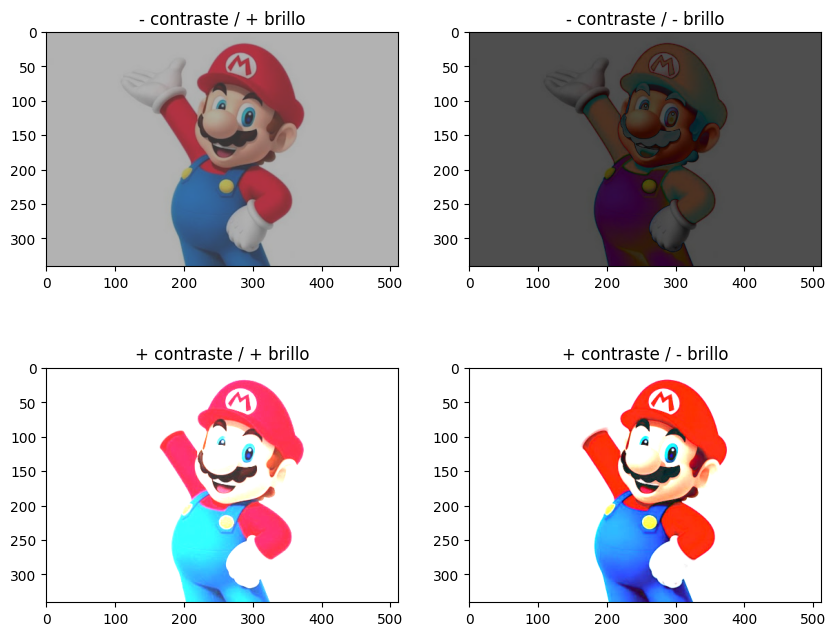

In [33]:
# Cambio brillo y contraste

# Imagen con menos contraste y más brillo
image_less_contrast_more_bright = brightness_contrast(img, brightness_control=50, contrast_control=0.5)
# Imagen con menos contraste y menos brillo
image_less_contrast_less_bright = brightness_contrast(img, brightness_control=-50, contrast_control=0.5)
# Imagen con más contraste y más brillo
image_more_contrast_more_bright = brightness_contrast(img, brightness_control=50, contrast_control=2)
# Imagen con más contraste y menos brillo
image_more_contrast_less_bright = brightness_contrast(img, brightness_control=-50, contrast_control=2)

# Visualizamos las 4 imágenes creadas
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_less_contrast_more_bright)
plt.title('- contraste / + brillo')
plt.subplot(2, 2, 2)
plt.imshow(image_less_contrast_less_bright)
plt.title('- contraste / - brillo')
plt.subplot(2, 2, 3)
plt.imshow(image_more_contrast_more_bright)
plt.title('+ contraste / + brillo')
plt.subplot(2, 2, 4)
plt.imshow(image_more_contrast_less_bright)
plt.title('+ contraste / - brillo')
plt.show()

# Filtrado de image

Como veremos más adelante, las redes neuronales convolucionales, se basan en la extracción de características mediante el uso de filtros que se aplican sobre la imagen.

En el campo de la visión de computador existen filtros comúnmente conocidos, como el filtro Sobel para la detección de bordes.

Text(0.5, 1.0, 'Bordes eje y (filas)')

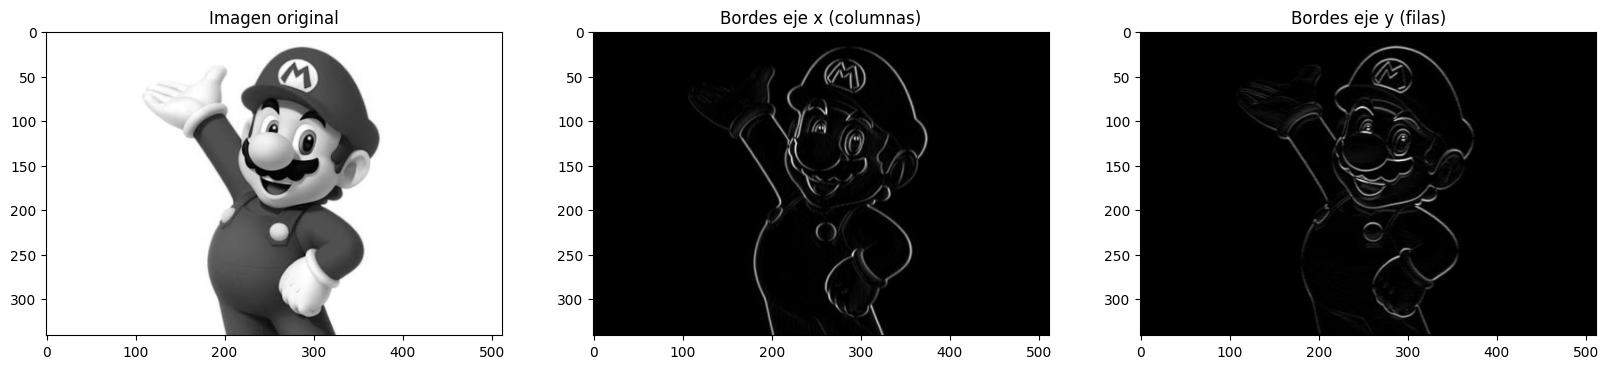

In [34]:
# Cargamos la imagen en escala de grises
image = cv2.imread('images/mariobros.jpeg', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for edge detection

# Aplicamos el filtro Sobel en la dirección x y en la dirección y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Filtro Sobel en la dirección x (columnas)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Filtro Sobel en la dirección y (filas)

# Nos quedamos con el valor absoluto para convertirlo en una matriz entre 0 y 1
sobel_x = np.abs(sobel_x)
sobel_y = np.abs(sobel_y)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, 'gray')
plt.title('Imagen original')
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, 'gray')
plt.title('Bordes eje x (columnas)')
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, 'gray')
plt.title('Bordes eje y (filas)')

Text(0.5, 1.0, 'Bordes')

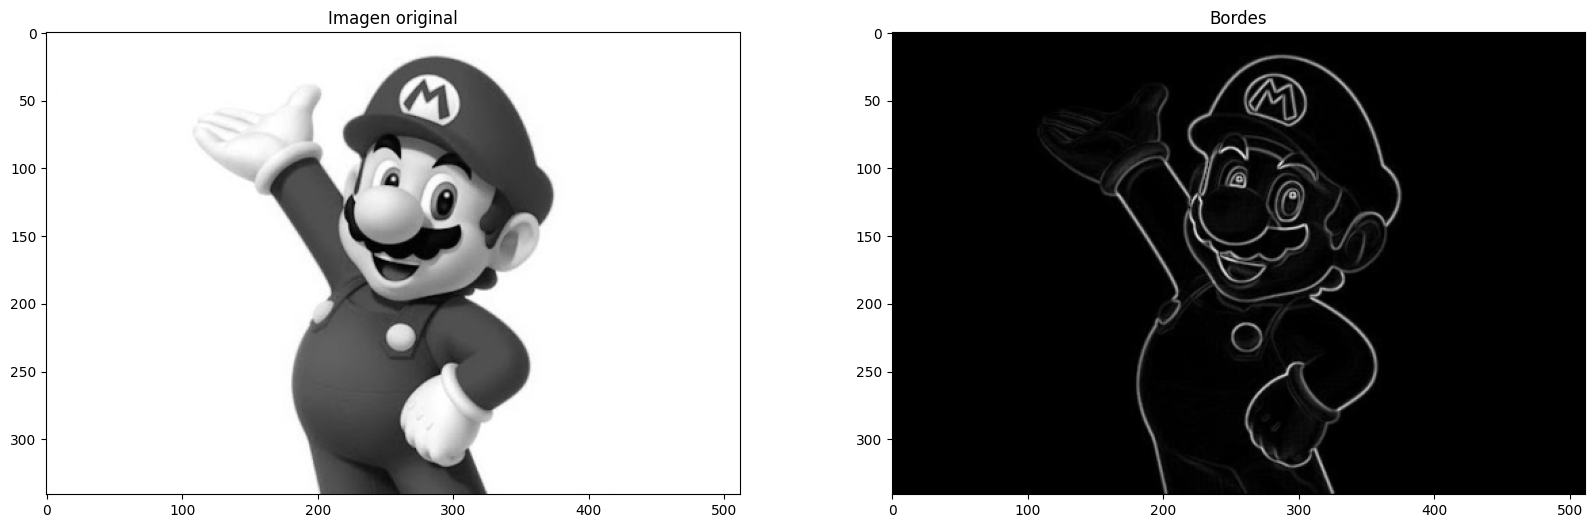

In [35]:
# También podemos generar una imagen de bordes combinación de ambas

edge_image = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, 'gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(edge_image, 'gray')
plt.title('Bordes')